<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Numero de pasajeros por cada puerta de embarque
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Accuracy: 0.8100558659217877

Matriz de confusión:
[[90 15]
 [19 55]]

Reporte de clasificación:
              precision    reca

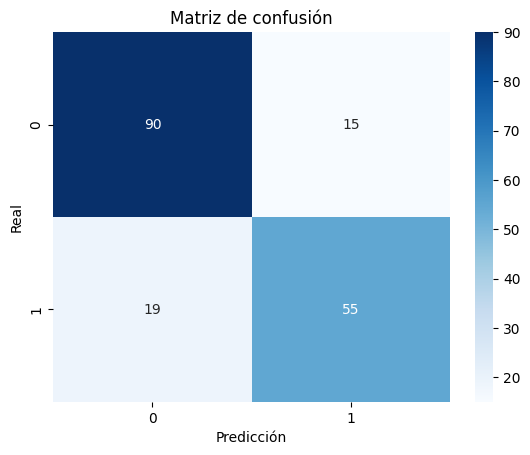

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

### Vamos a entrenar al modelo para intentar predecir: ¿Quienes tenían más posibilidades de sobrevivir?
# 1. Cargar datos limpios
# ======================
pc = pd.read_csv("../data/train.csv")

print(pc.info()) # Lo hacemos para ver si falta algun dato, en este caso faltan algunos registros importantes
print("\nNumero de pasajeros por cada puerta de embarque")
print(pc["Embarked"].value_counts()) 


# Limpieza rápida 
# Quitamos las que no nos sriven
pc = pc.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
# Hay 177 pasajeros que no tienen edad, pues vamos a rellenar con la edad media de los pasajeros que si tienen
pc["Age"] = pc["Age"].fillna(pc["Age"].mean())
# hay también 2 pasajeros que no tienen puerta de embarque, lo rellenamos con S (Southampton) ya que como hemos visto era desde donde más gente salio
pc["Embarked"] = pc["Embarked"].fillna(pc["Embarked"].mode()[0])
# Convertimos a binario ambos sexos
pc["Sex"] = pc["Sex"].map({"male": 0, "female": 1})

# Transformamos las columnas a binarias 
pc = pd.get_dummies(pc, columns=["Embarked"], drop_first=True)

# 2. Separar X e y
# Columna y es siempre la que queremos predecir, columna x son las demas columnas,
# en nuestro caso queremos entrenar al modelo para intentar predecir quienes tenían mas posibilidades de sobrevivir
# entonces como queremos predecir la columna Survived pues X valdrá todo menos la columna Survived, e Y valdra Survived
X = pc.drop("Survived", axis=1)
y = pc["Survived"]

# 3. Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ======================
# 4. Entrenar modelo
# ======================
modelo = LogisticRegression(max_iter=200)  # max_iter para asegurar convergencia
modelo.fit(X_train, y_train)

# ======================
# 5. Predicciones
# ======================
y_pred = modelo.predict(X_test)

# ======================
# 6. Evaluación
# ======================
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Visualizar matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()
